AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
first_10_rows = df.head(10)
last_20_rows = df.tail(20)
info = df.info()
description = df.describe()

summary = pd.DataFrame({
    'First 10 Rows': [first_10_rows.to_string(index=False)],
    'Last 20 Rows': [last_20_rows.to_string(index=False)],
    'Info': [str(info)],
    'Description': [description.to_string()]
})

print(summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
                                       First 10 Rows  \
0   PassengerId Survived  Pclass                 ...   

                                        Last 20 Rows  Info  \
0   PassengerId Survived  Pclass                 ...  None   

      

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values count:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


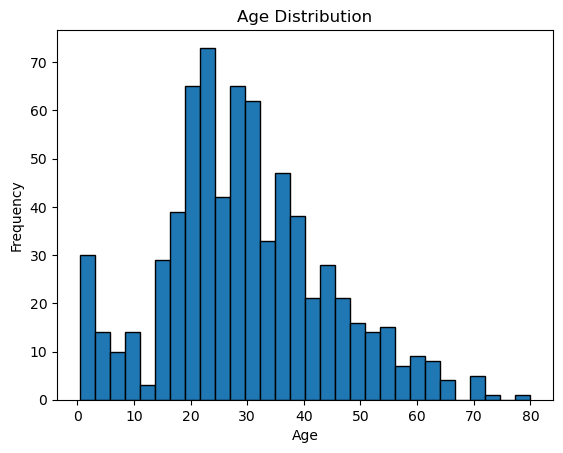

Median Age: 28.0
Unique values in Survived column: ['0' '1' 'Zero' 'One']
Processed dataset:
    PassengerId Survived  Pclass  \
0            1        0       3   
1            2        0       1   
2            3        0       3   
3            4        0       1   
4            5        0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Cabin_Exists  
0      0         A/5 21171   7.2500  Unknown        S             0  
1      0          PC 17599  71.2833      C85        C             1  
2      0  STON/O2. 310

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('titanic.csv')

# 1.1 Count missing values
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# 2. Handle missing values in the 'Age' column
# 2.1 Visualize the 'Age' column
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 Calculate the central tendency for 'Age'
age_median = df['Age'].median()
print(f'Median Age: {age_median}')

# 2.3 Fill missing 'Age' values
df['Age'].fillna(age_median, inplace=True)

# 3. Handle missing values in the 'Cabin' column
df['Cabin_Exists'] = df['Cabin'].notnull().astype(int)
df['Cabin'].fillna('Unknown', inplace=True)

# 4. Handle missing values in the 'Embarked' column
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

# 5. Handle incorrect data in the 'Survived' column
print("Unique values in Survived column:", df['Survived'].unique())
invalid_survived = df['Survived'].isin([0, 1]) == False
if invalid_survived.any():
    survived_mode = df['Survived'].mode()[0]
    df.loc[invalid_survived, 'Survived'] = survived_mode

# 6. Handle incorrectly formatted data in the 'Fare' column
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
fare_median = df['Fare'].median()
df['Fare'].fillna(fare_median, inplace=True)

# Output the processed dataset
print("Processed dataset:\n", df.head())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average Fare by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


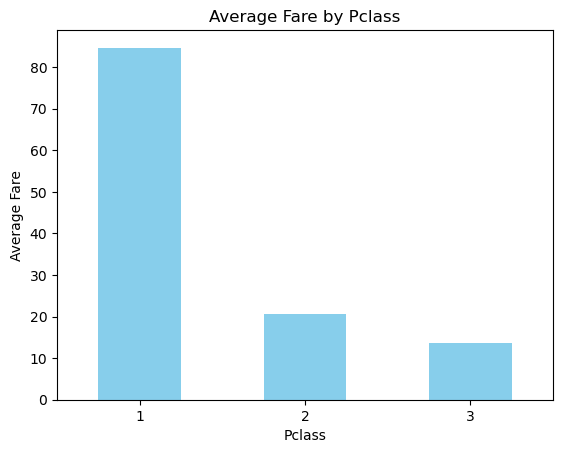

Average Fare by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


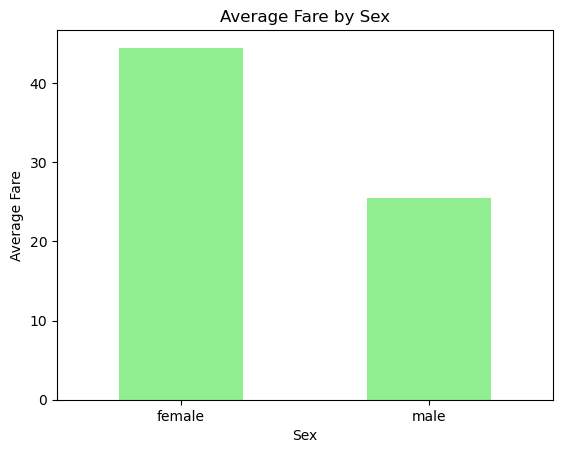

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Ensure the 'Fare' column is numeric, forcing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# 1. Average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:\n", average_fare_by_pclass)

# 1.1. Plotting
average_fare_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

# 2. Average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:\n", average_fare_by_sex)

# 2.1. Plotting
average_fare_by_sex.plot(kind='bar', color='lightgreen')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

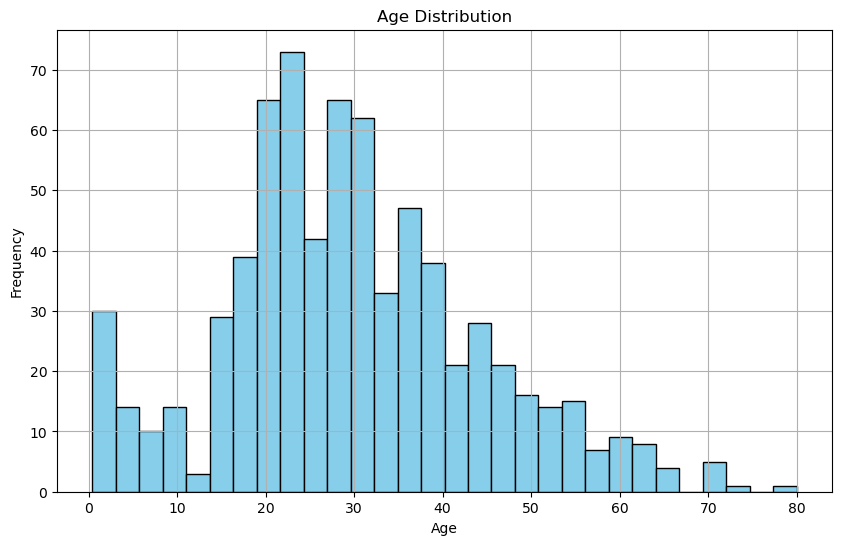

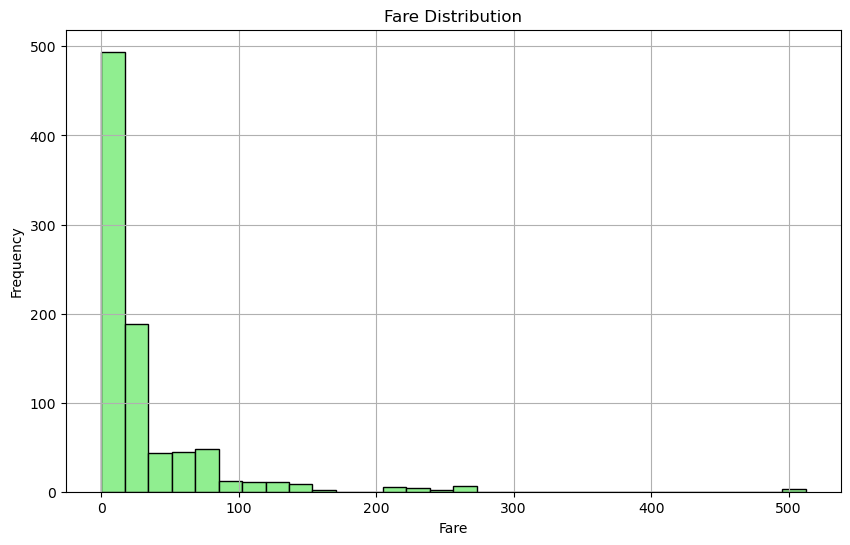

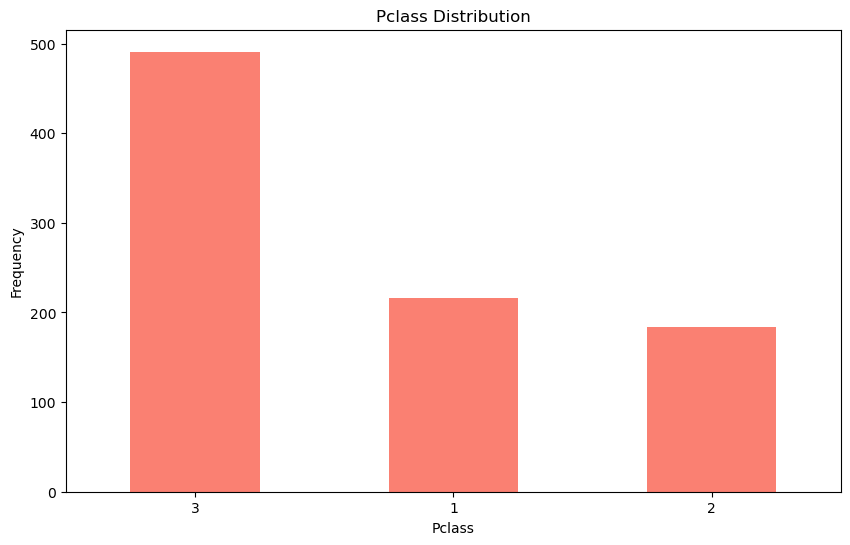

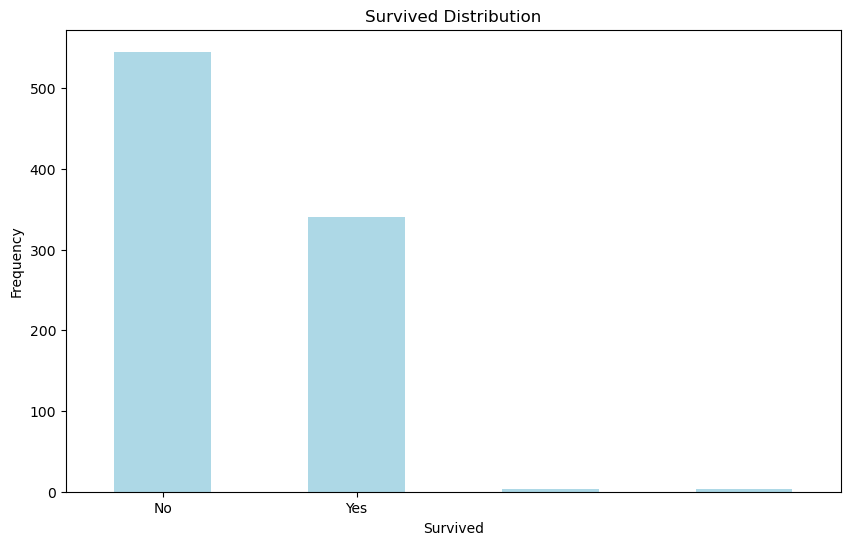

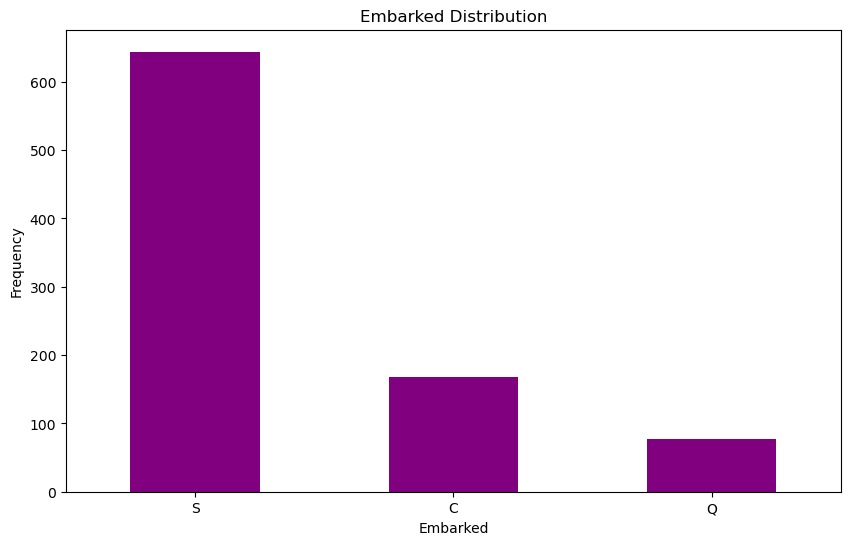

<Figure size 1000x600 with 0 Axes>

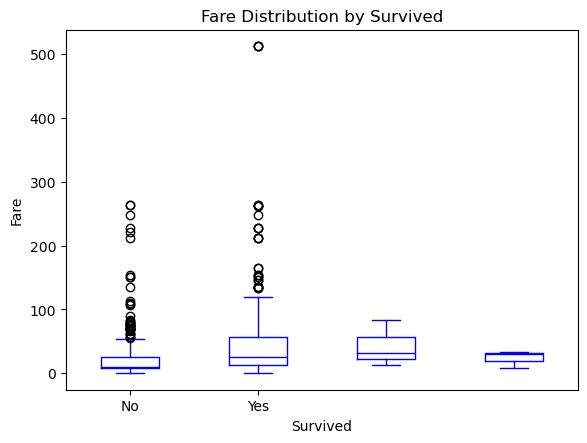

<Figure size 1000x600 with 0 Axes>

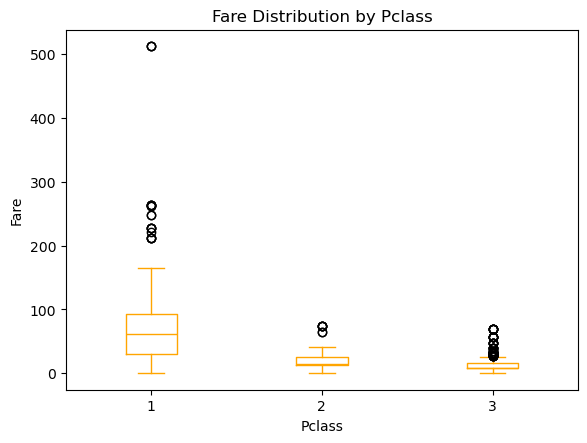

<Figure size 1000x600 with 0 Axes>

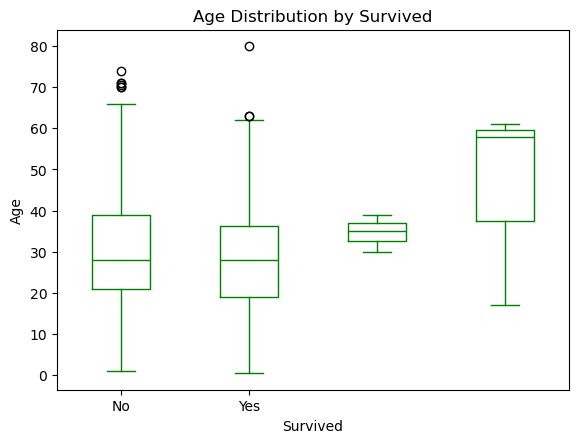

<Figure size 1000x600 with 0 Axes>

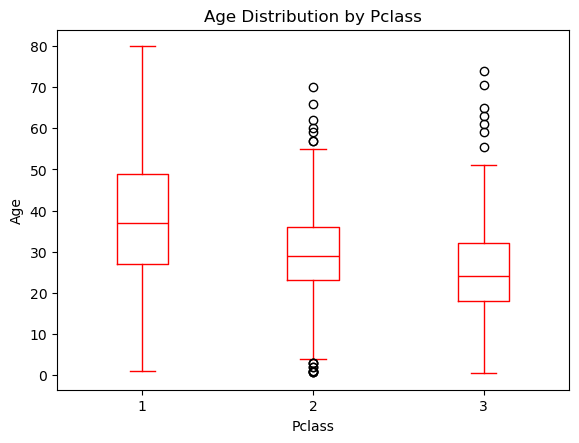

<Figure size 1000x600 with 0 Axes>

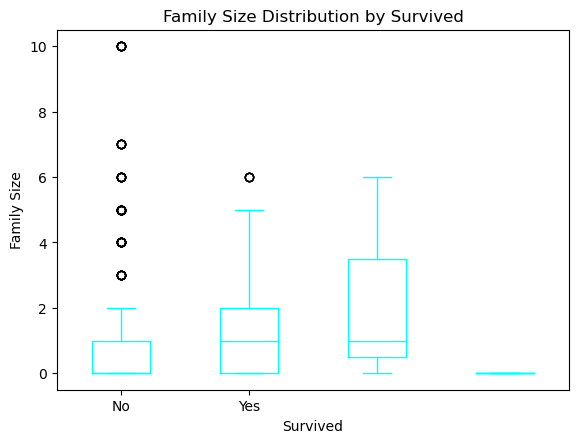

<Figure size 1000x600 with 0 Axes>

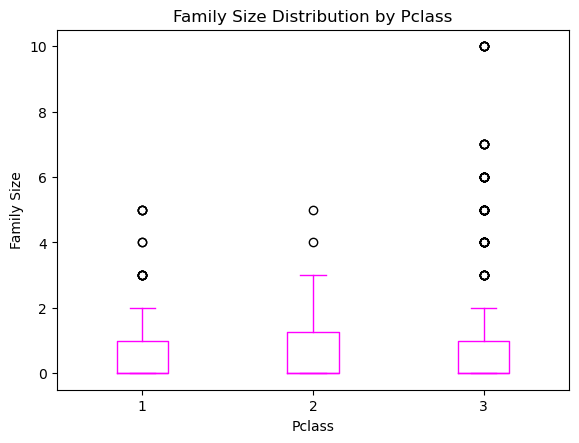

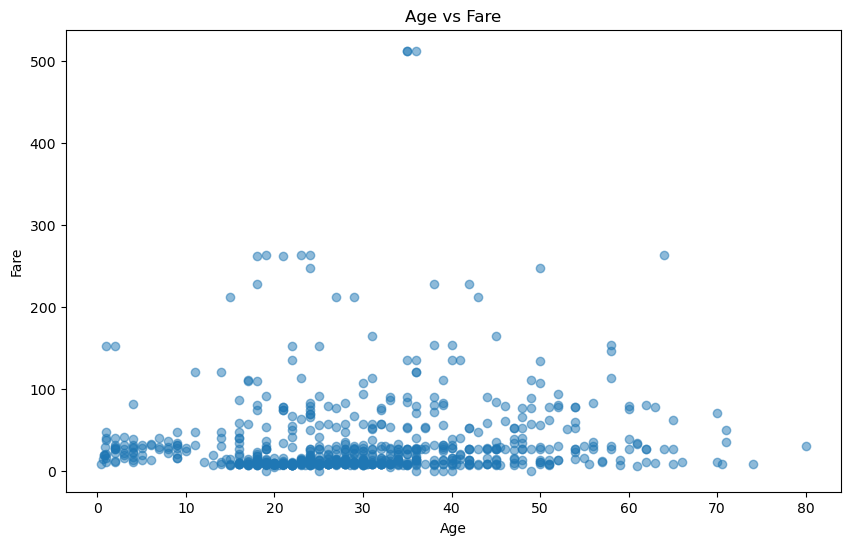

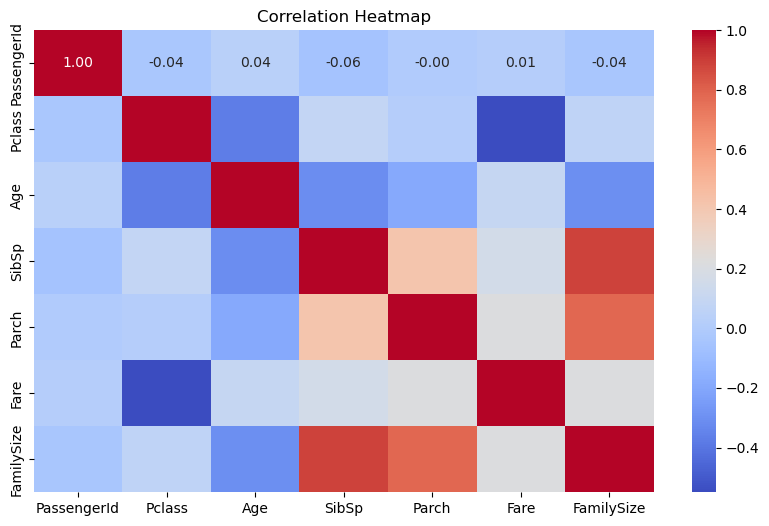

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('titanic.csv')

# Ensure the 'Fare' column is numeric, forcing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# 1. Distribution of 'Age'
plt.figure(figsize=(10, 6))
df['Age'].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of 'Fare'
plt.figure(figsize=(10, 6))
df['Fare'].dropna().hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of 'Pclass'
plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().plot(kind='bar', color='salmon')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 4. Distribution of 'Survived'
plt.figure(figsize=(10, 6))
df['Survived'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# 5. Distribution of 'Embarked'
plt.figure(figsize=(10, 6))
df['Embarked'].value_counts().plot(kind='bar', color='purple')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 6. Distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Survived', grid=False, color='blue')
plt.title('Fare Distribution by Survived')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks(ticks=[1, 2], labels=['No', 'Yes'])
plt.show()

# 7. Distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Pclass', grid=False, color='orange')
plt.title('Fare Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Survived', grid=False, color='green')
plt.title('Age Distribution by Survived')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks(ticks=[1, 2], labels=['No', 'Yes'])
plt.show()

# 9. Distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Pclass', grid=False, color='red')
plt.title('Age Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
df.boxplot(column='FamilySize', by='Survived', grid=False, color='cyan')
plt.title('Family Size Distribution by Survived')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.xticks(ticks=[1, 2], labels=['No', 'Yes'])
plt.show()

# 11. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10, 6))
df.boxplot(column='FamilySize', by='Pclass', grid=False, color='magenta')
plt.title('Family Size Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Heatmap of correlations (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Ensure the 'Fare' and 'Age' columns are numeric, forcing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Optionally convert categorical columns to numerical using one-hot encoding
# For example, convert 'Sex' to numerical values
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Retain only numeric columns for correlation, but keep 'Survived'
df_cleaned = df.select_dtypes(include=['number'])

# 1. Generate a correlation matrix for the entire dataset
correlation_matrix = df_cleaned.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Find correlation between 'Age' and 'Fare'
age_fare_correlation = df_cleaned['Age'].corr(df_cleaned['Fare'])
print(f"Correlation between 'Age' and 'Fare': {age_fare_correlation:.2f}")




Correlation Matrix:
              PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.013500
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.550122
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096511
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159746
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216417
Fare            0.013500 -0.550122  0.096511  0.159746  0.216417  1.000000
Correlation between 'Age' and 'Fare': 0.10
